In [1]:
pip install matplotlib opencv-python-headless

   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.5 MB 2.1 MB/s eta 0:00:18
   ---------------------------------------- 0.3/38.5 MB 3.2 MB/s eta 0:00:12
   ---------------------------------------- 0.5/38.5 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.7/38.5 MB 3.2 MB/s eta 0:00:12
    --------------------------------------- 0.8/38.5 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.8/38.5 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.9/38.5 MB 2.7 MB/s eta 0:00:14
   - -------------------------------------- 1.0/38.5 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.2/38.5 MB 2.7 MB/s eta 0:00:14
   - -------------------------------------- 1.2/38.5 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.4/38.5 MB 2.5 MB/s eta 0:00:15
   - -------------------------------------- 1.5/38.5 MB 2.6 MB/s eta 0:00:15
   - -

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def local_binary_pattern(image):
    height, width = image.shape
    lbp_image = np.zeros((height - 2, width - 2), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center = image[i, j]
            pixels = [image[i-1, j-1], image[i-1, j], image[i-1, j+1],
                      image[i, j+1], image[i+1, j+1], image[i+1, j],
                      image[i+1, j-1], image[i, j-1]]

            binary_values = (np.array(pixels) >= center).astype(int)
            decimal_value = np.sum(binary_values * 2**np.arange(8))
            lbp_image[i-1, j-1] = decimal_value

    return lbp_image

In [4]:
def process_image(image_path):
    # Load the input image
    img_rgb = cv2.imread(image_path)

    if img_rgb is not None:
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        # Continue with the rest of your code
        lbp_result = local_binary_pattern(img_gray)

        # Display the original and LBP images
        fig, ax = plt.subplots(1, 3, figsize=(12, 6))

        ax[0].imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
        ax[0].set_title('Original Image')
        ax[0].axis('off')

        ax[1].imshow(img_gray, cmap='gray')
        ax[1].set_title('Grayscale Image')
        ax[1].axis('off')

        ax[2].imshow(lbp_result, cmap='gray')
        ax[2].set_title('LBP Result')
        ax[2].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("Error: Unable to load the image.")


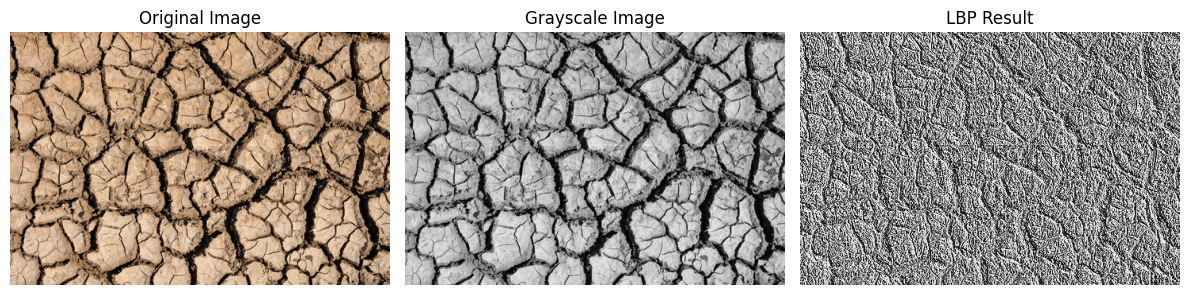

In [5]:
process_image(r'new.jpg')